In [109]:
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
name = "test-policy6"
df_prob = pd.read_csv(f'data/{name}-prob.log')
df_basic = pd.read_csv(f'data/{name}-basic.log')

In [111]:
# Print the size of the df
print(df_prob.shape)
print(df_basic.shape)

(615, 17)
(615, 17)


In [112]:
df_prob.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1674728383024,5687,HTTP Request 1,200,OK,ThreadGroup1 1-1,text,True,NaN,352,281,6,6,http://10.10.1.2:1323/invoke/fib,5683,0,37
1,1674728385735,5304,HTTP Request 1,200,OK,ThreadGroup1 1-3,text,True,NaN,359,281,5,5,http://10.10.1.2:1323/invoke/fib,5304,0,1
2,1674728388559,4459,HTTP Request 1,200,OK,ThreadGroup1 1-6,text,True,NaN,352,281,5,5,http://10.10.1.2:1323/invoke/fib,4459,0,1
3,1674728387921,5298,HTTP Request 1,200,OK,ThreadGroup1 1-5,text,True,NaN,351,281,4,4,http://10.10.1.2:1323/invoke/fib,5298,0,1
4,1674728392992,4330,HTTP Request 1,200,OK,ThreadGroup1 1-7,text,True,NaN,352,281,5,5,http://10.10.1.2:1323/invoke/fib,4330,0,1


In [113]:
# Filter df based on response code
success_prob = df_prob[df_prob['responseCode'] == 200]
success_basic = df_basic[df_basic['responseCode'] == 200]

failure_prob = df_prob[df_prob['responseCode'] != 200]
failure_basic = df_basic[df_basic['responseCode'] != 200]

In [114]:
# Get the mean latency for successfull df
mean_latency_prob = success_prob['Latency'].mean()
mean_latency_basic = success_basic['Latency'].mean()
print(f"Mean latency prob: {mean_latency_prob}")
print(f"Mean latency basic: {mean_latency_basic}")

Mean latency prob: 4411.626016260163
Mean latency basic: 5519.69268292683


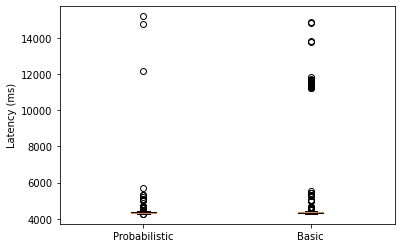

In [115]:
# Box plot for latency
plt.boxplot([success_prob['Latency'], success_basic['Latency']])
plt.xticks([1, 2], ['Probabilistic', 'Basic'])
plt.ylabel('Latency (ms)')
plt.show()

In [116]:
filtered_prob_t1 = success_prob[success_prob['threadName'].str.contains("ThreadGroup1", na=False)]
filtered_prob_t2 = success_prob[success_prob['threadName'].str.contains('ThreadGroup2', na=False)]
filtered_basic_t1 = success_basic[success_basic['threadName'].str.contains('ThreadGroup1', na=False)]
filtered_basic_t2 = success_basic[success_basic['threadName'].str.contains('ThreadGroup2', na=False)]

In [118]:
#Get only Url
url_1 = filtered_prob_t1['URL'].iloc[0]
fun_name_1 = url_1.split('/')[4]
print(f"Function 1: {fun_name_1}")
if filtered_basic_t2.size > 0:
    url_2 = filtered_basic_t2['URL'].iloc[0]
    fun_name_2 = url_2.split('/')[4]
    print(f"Function 2: {fun_name_2}")

Function 1: fib


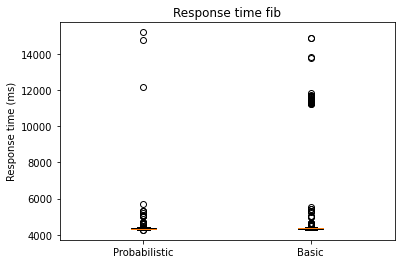

In [119]:
plt.show()
fig, ax = plt.subplots()
ax.boxplot([filtered_prob_t1['elapsed'], filtered_basic_t1['elapsed']])
ax.set_xticklabels(['Probabilistic', 'Basic'])
ax.set_ylabel('Response time (ms)')
ax.set_title(f'Response time {fun_name_1}')
plt.show()

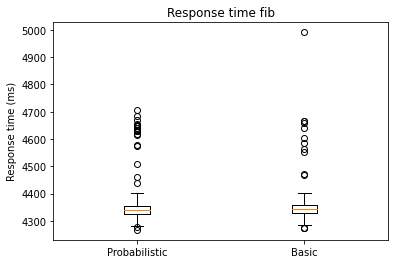

In [127]:
limit = 5000
fig, ax = plt.subplots()
ax.boxplot([filtered_prob_t1['elapsed'][filtered_prob_t1['elapsed'] < limit],
            filtered_basic_t1['elapsed'][filtered_basic_t1['elapsed'] < limit]])
ax.set_xticklabels(['Probabilistic', 'Basic'])
ax.set_ylabel('Response time (ms)')
ax.set_title(f'Response time {fun_name_1}')
plt.show()

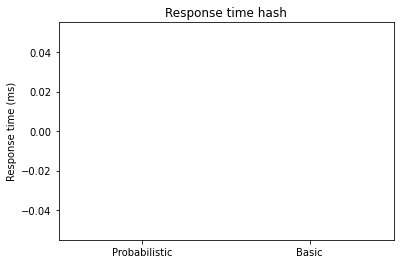

In [121]:
plt.show()
fig, ax = plt.subplots()
ax.boxplot([filtered_prob_t2['elapsed'], filtered_basic_t2['elapsed']])
ax.set_xticklabels(['Probabilistic', 'Basic'])
ax.set_ylabel('Response time (ms)')
ax.set_title(f'Response time {fun_name_2}')
plt.show()

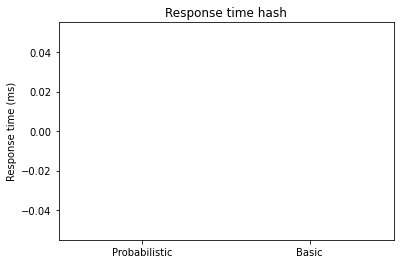

In [122]:
limit = 1000
fig, ax = plt.subplots()
ax.boxplot([filtered_prob_t2['elapsed'][filtered_prob_t2['elapsed'] < limit],
            filtered_basic_t2['elapsed'][filtered_basic_t2['elapsed'] < limit]])
ax.set_xticklabels(['Probabilistic', 'Basic'])
ax.set_ylabel('Response time (ms)')
ax.set_title(f'Response time {fun_name_2}')
plt.show()